In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn_analyzer import CustomPairPlot
from sklearn.preprocessing import LabelEncoder
from mlxtend.preprocessing import TransactionEncoder

import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

# Bank marketing data

$\textbf{Describe:}$

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

$\textbf{Task:}$

Build a model to extract rules that can help with targeted marketing, based on customer demographics and banking data.

$\textbf{Group:}$

Association Rule

## Import Data

In [28]:
data = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [29]:
duplicates = data.duplicated(keep=False)
dup_indices = data[duplicates].index
duplicate_rows = data[duplicates]

In [30]:
duplicate_rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [5]:
data = data.drop_duplicates()

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Check Null data

In file "bank-additional-anmes.txt":

8. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [8]:
null_counts = []
col_null = []
for col in data.columns:
    total_null = 0
    if data[col].dtype == 'object':
        total_null = (data[col] == 'unknown').sum()
    else:
        total_null = data[col].isnull().sum()
    null_counts.append(total_null)
    col_null.append(col)
    
display(pd.DataFrame(data=null_counts, columns=['Total null data'], index=col_null))

,Total null data
age,0
job,330
marital,80
education,1730
default,8596
housing,990
loan,990
contact,0
month,0
day_of_week,0


## Count Values

In [9]:
total_columns = len(data.columns)
print(total_columns)

21


In [10]:
object_columns = []
number_columns = []
for col in data.columns:
    if data[col].dtype == 'object':
        object_columns.append(col)
    else:
        number_columns.append(col)
        
print(len(object_columns), len(number_columns))

11 10


In [31]:
object_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

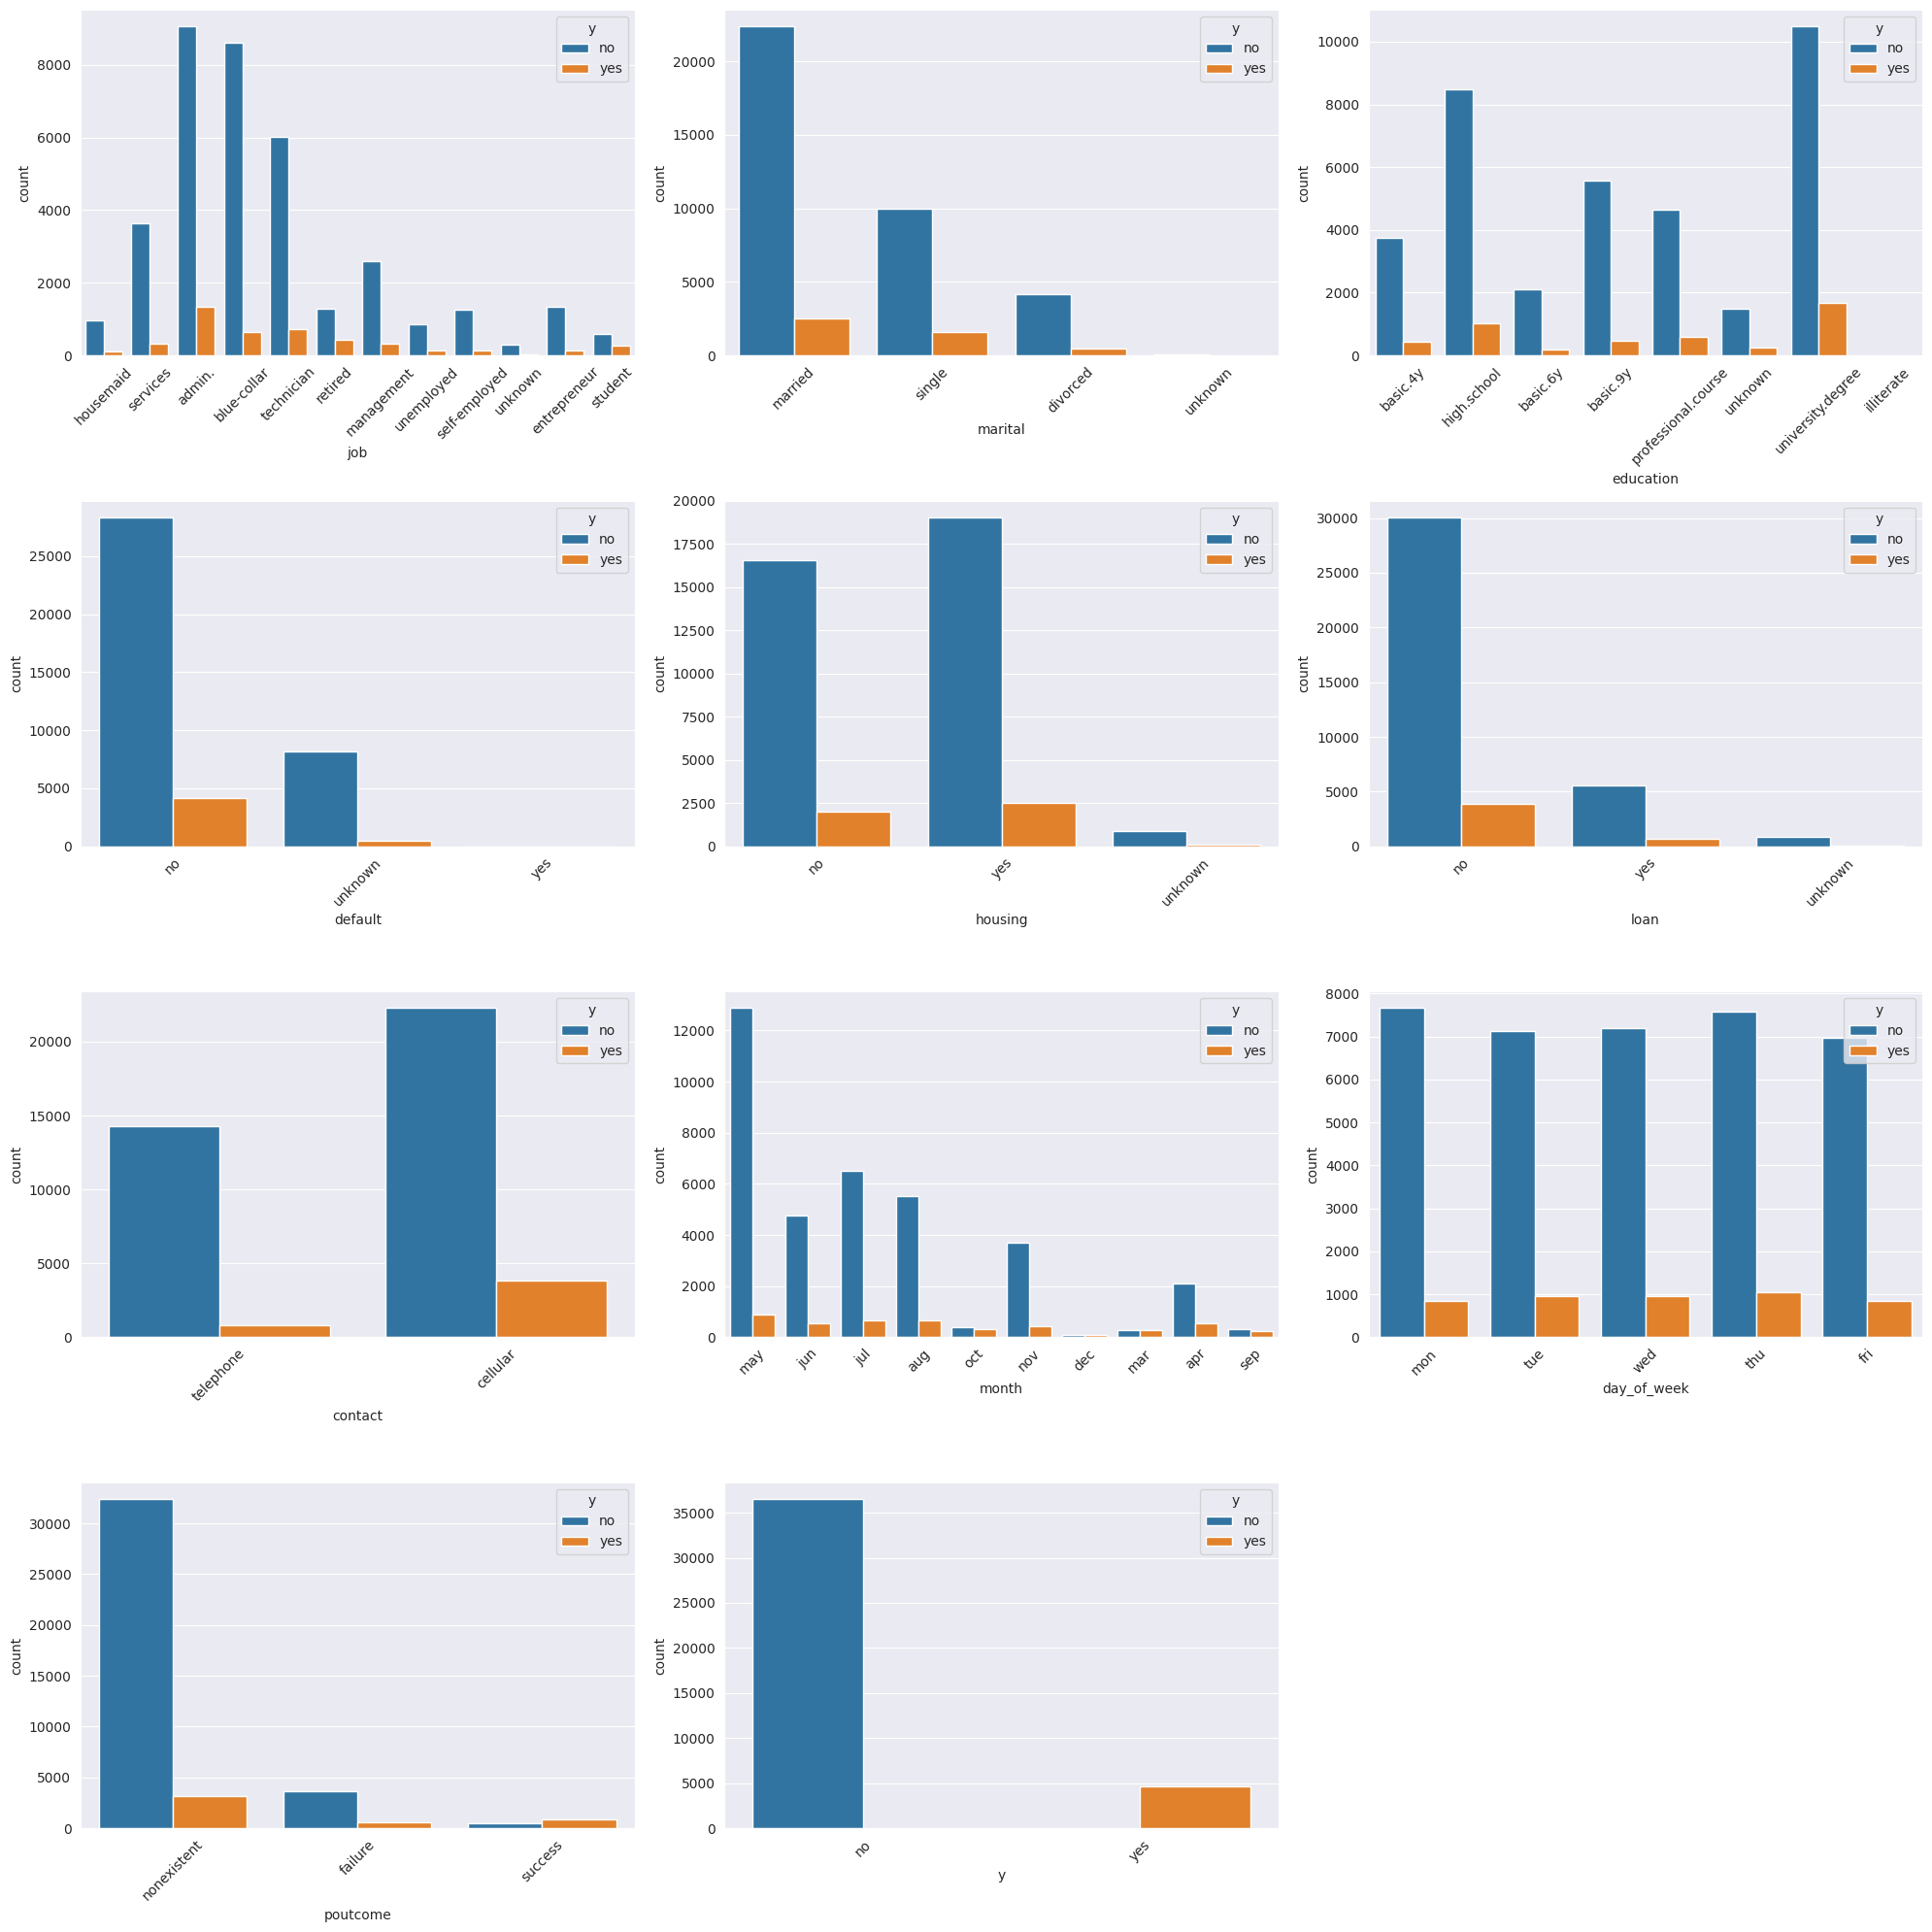

In [11]:
plt.figure(figsize=(20, 20))

for i in range(len(object_columns)):
    plt.subplot(4, 3, i+1)    
    sns.countplot(data, x=object_columns[i], hue='y')
    plt.xticks(rotation = 45)
    
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

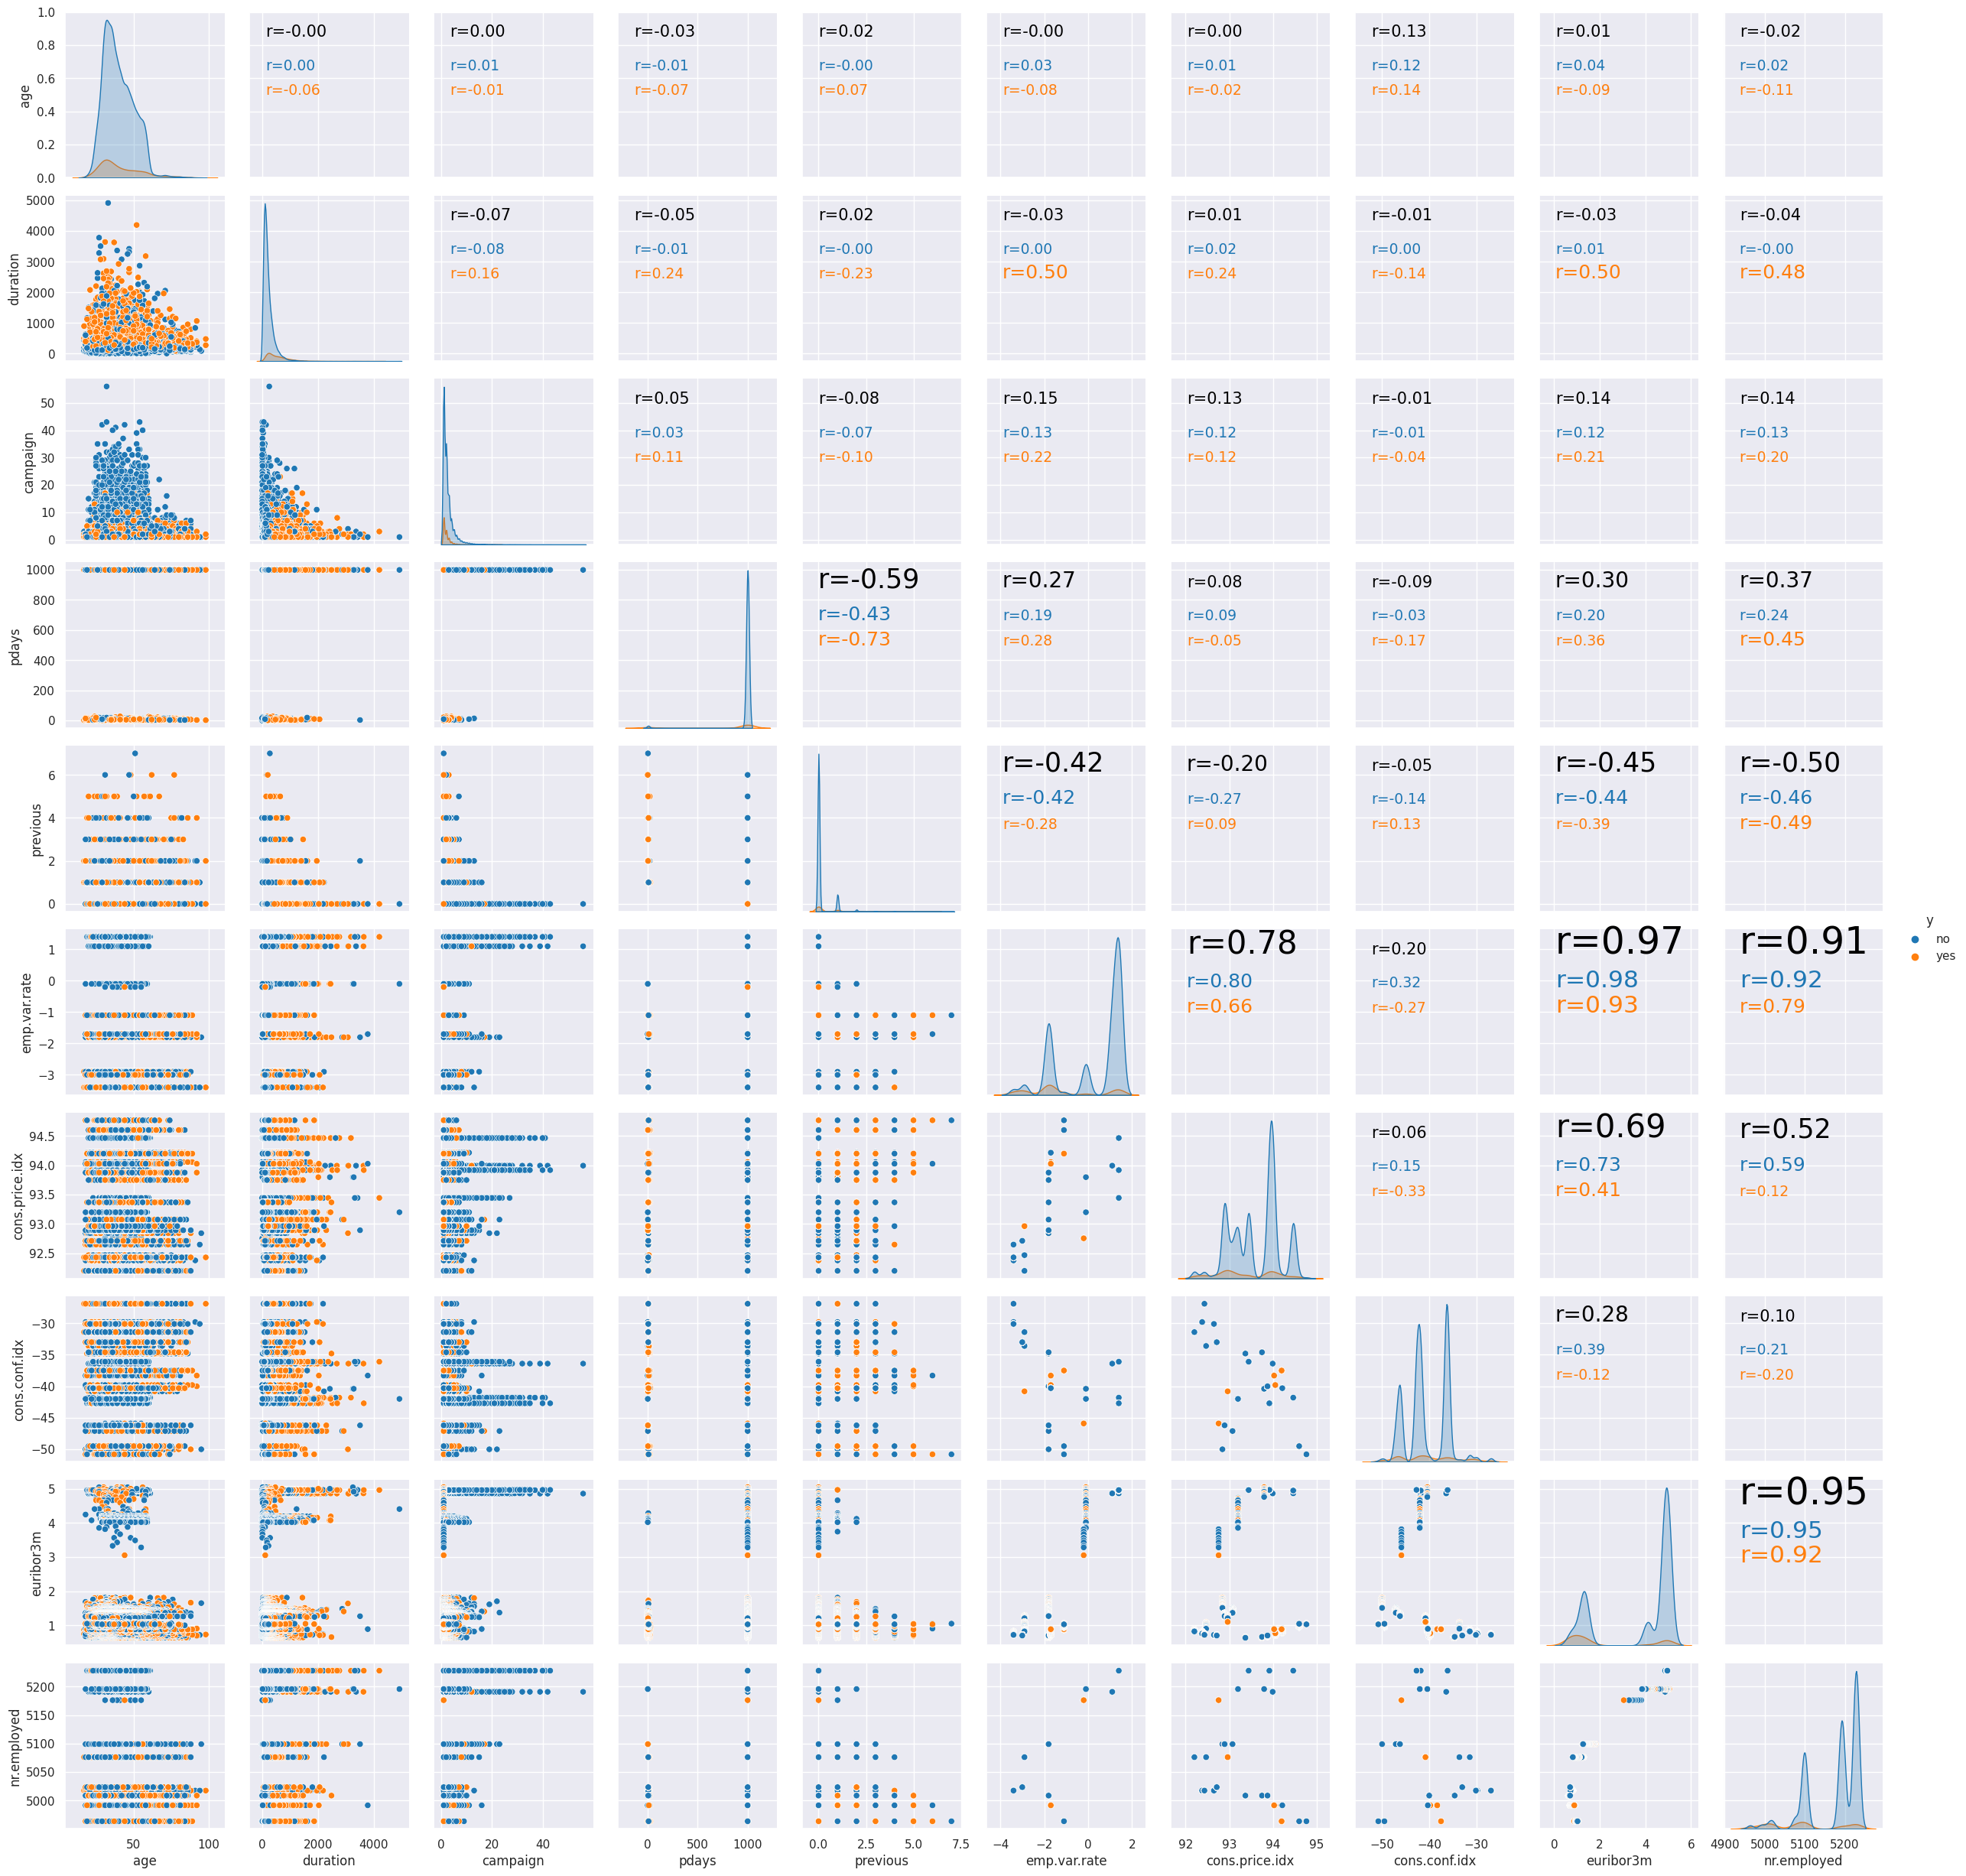

In [12]:
cp = CustomPairPlot()
cp.pairanalyzer(data, hue='y')

## Balance Target

In [13]:
len_yes = len(data[data['y'] == 'yes'])
len_no = len(data[data['y'] == 'no'])

size_drop = len_no - len_yes
index_no = data[data['y'] == 'no'].index

if size_drop > 0:
    index_random = np.random.choice(index_no, size=size_drop, replace=False)
    data = data.drop(index=index_random).reset_index(drop=True)

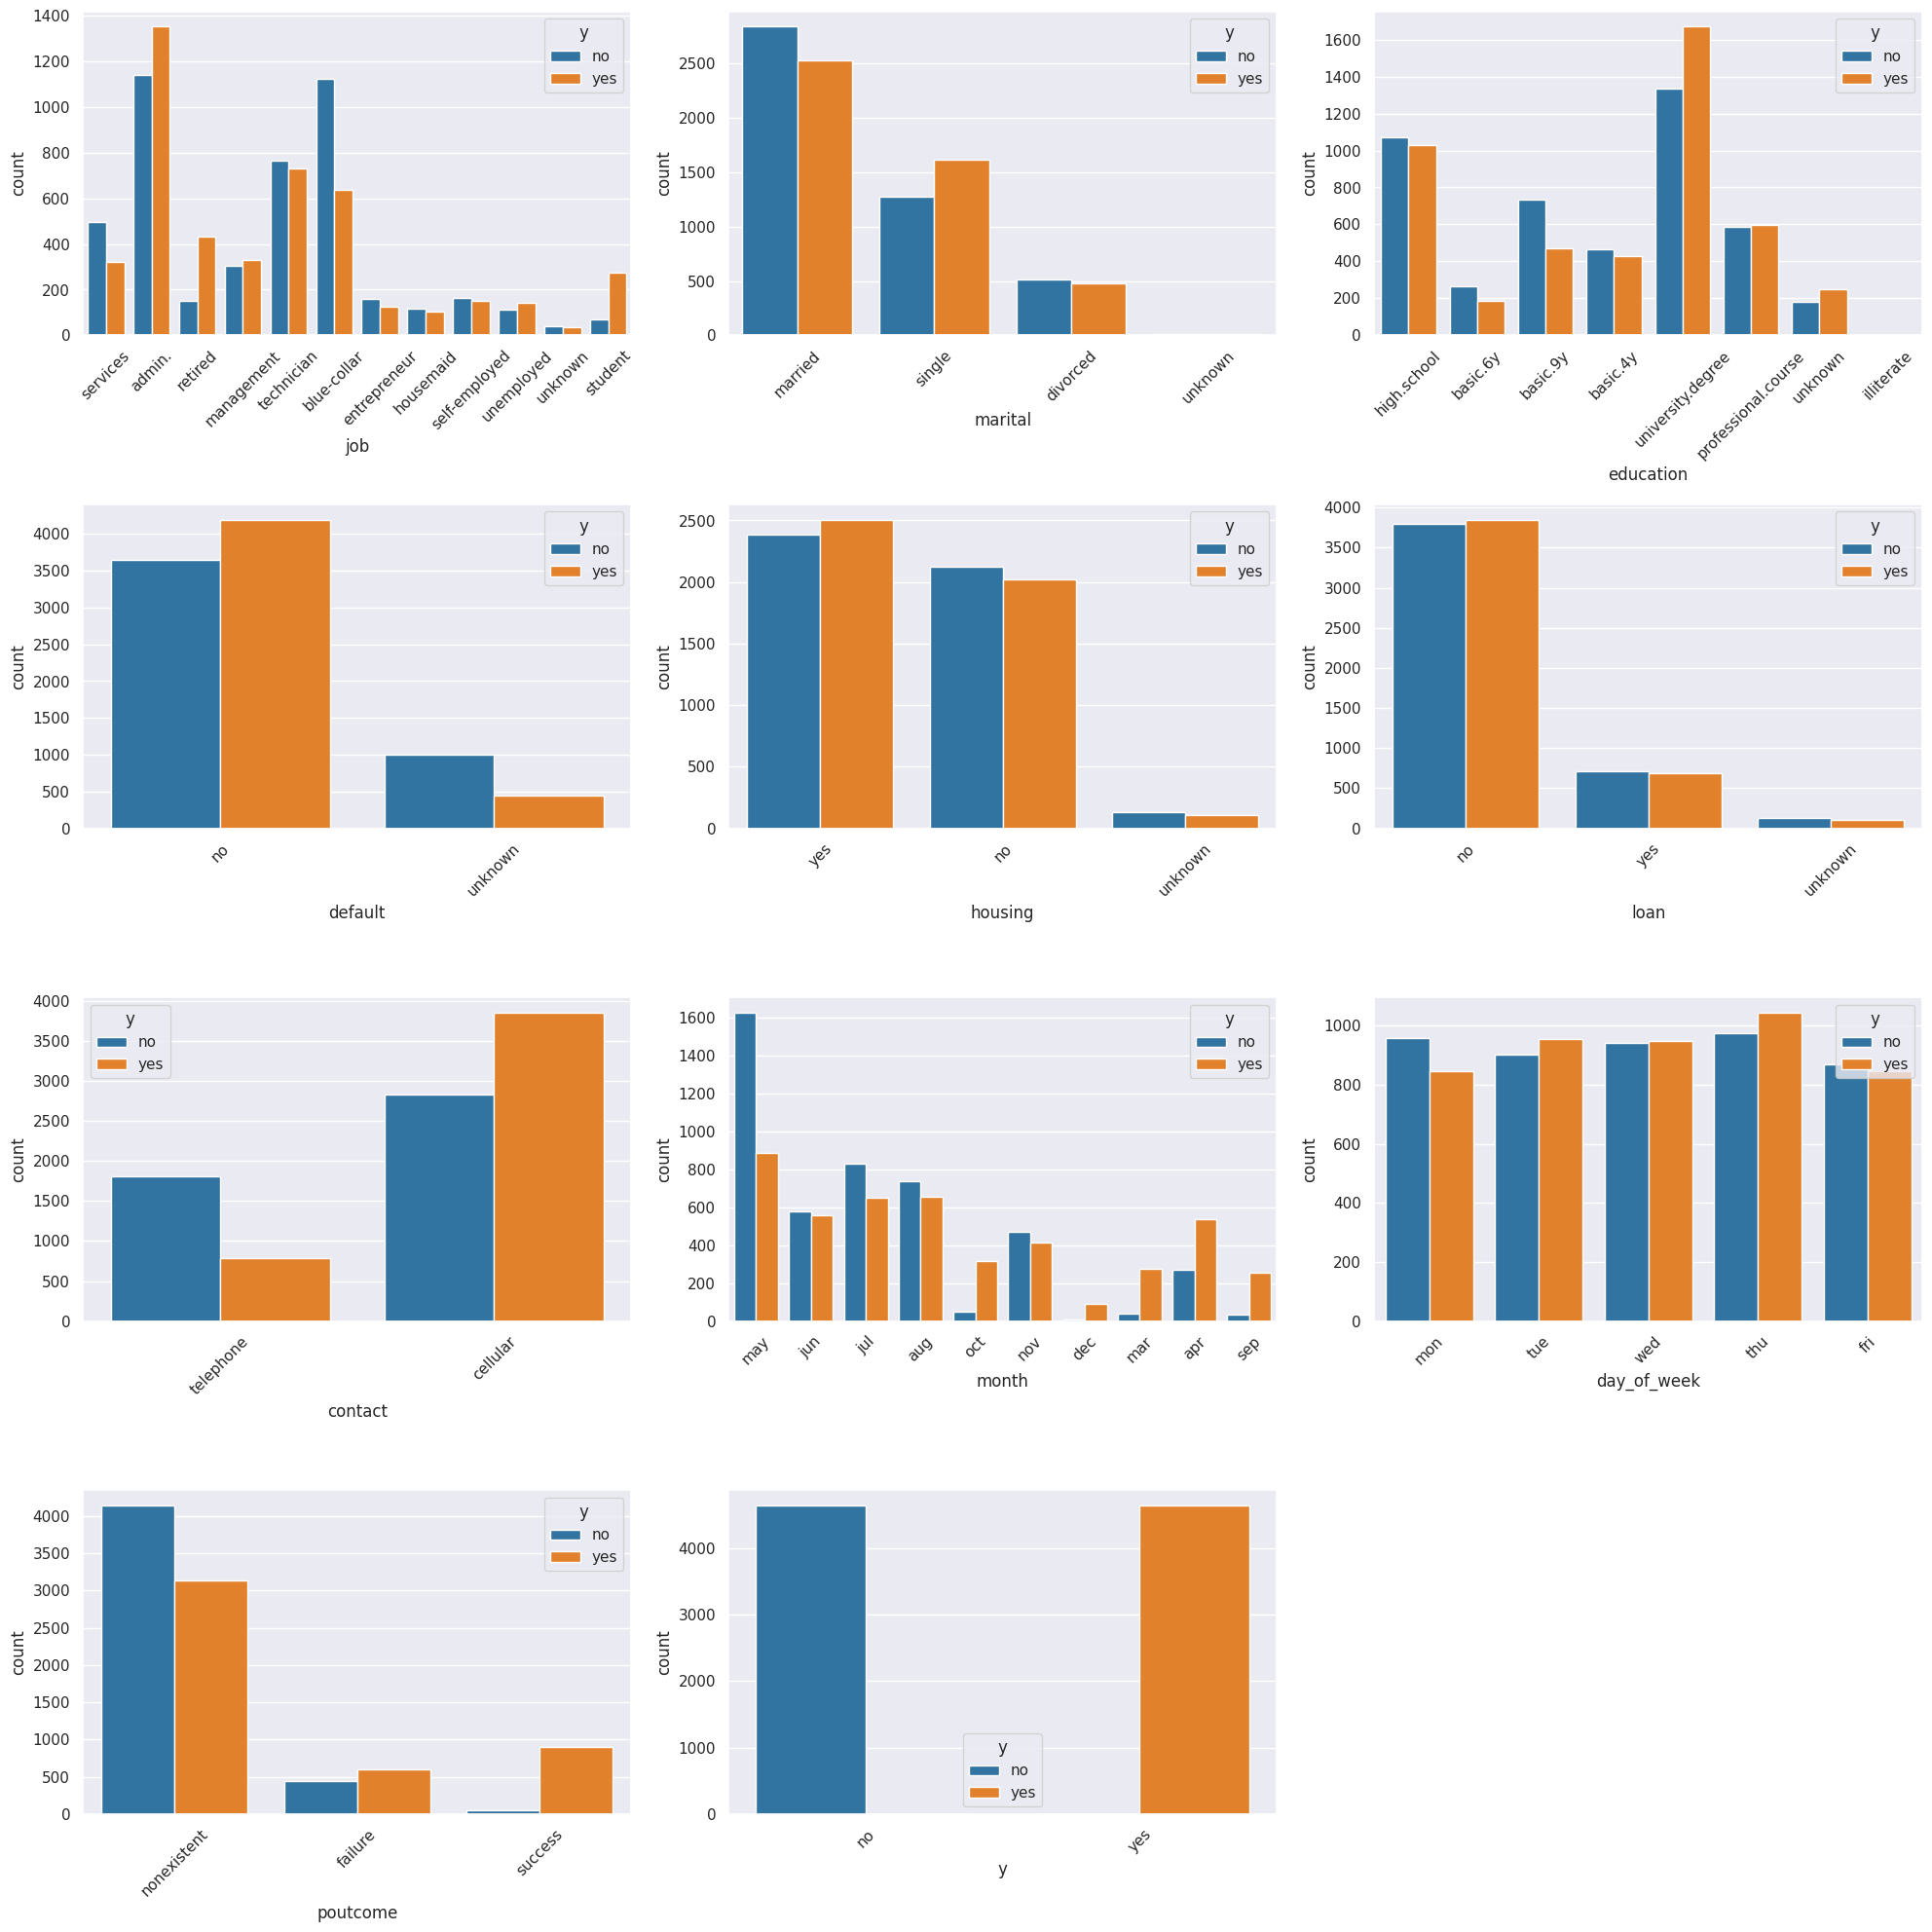

In [14]:
plt.figure(figsize=(20, 20))

for i in range(len(object_columns)):
    plt.subplot(4, 3, i+1)    
    sns.countplot(data, x=object_columns[i], hue='y')
    plt.xticks(rotation = 45)
    
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

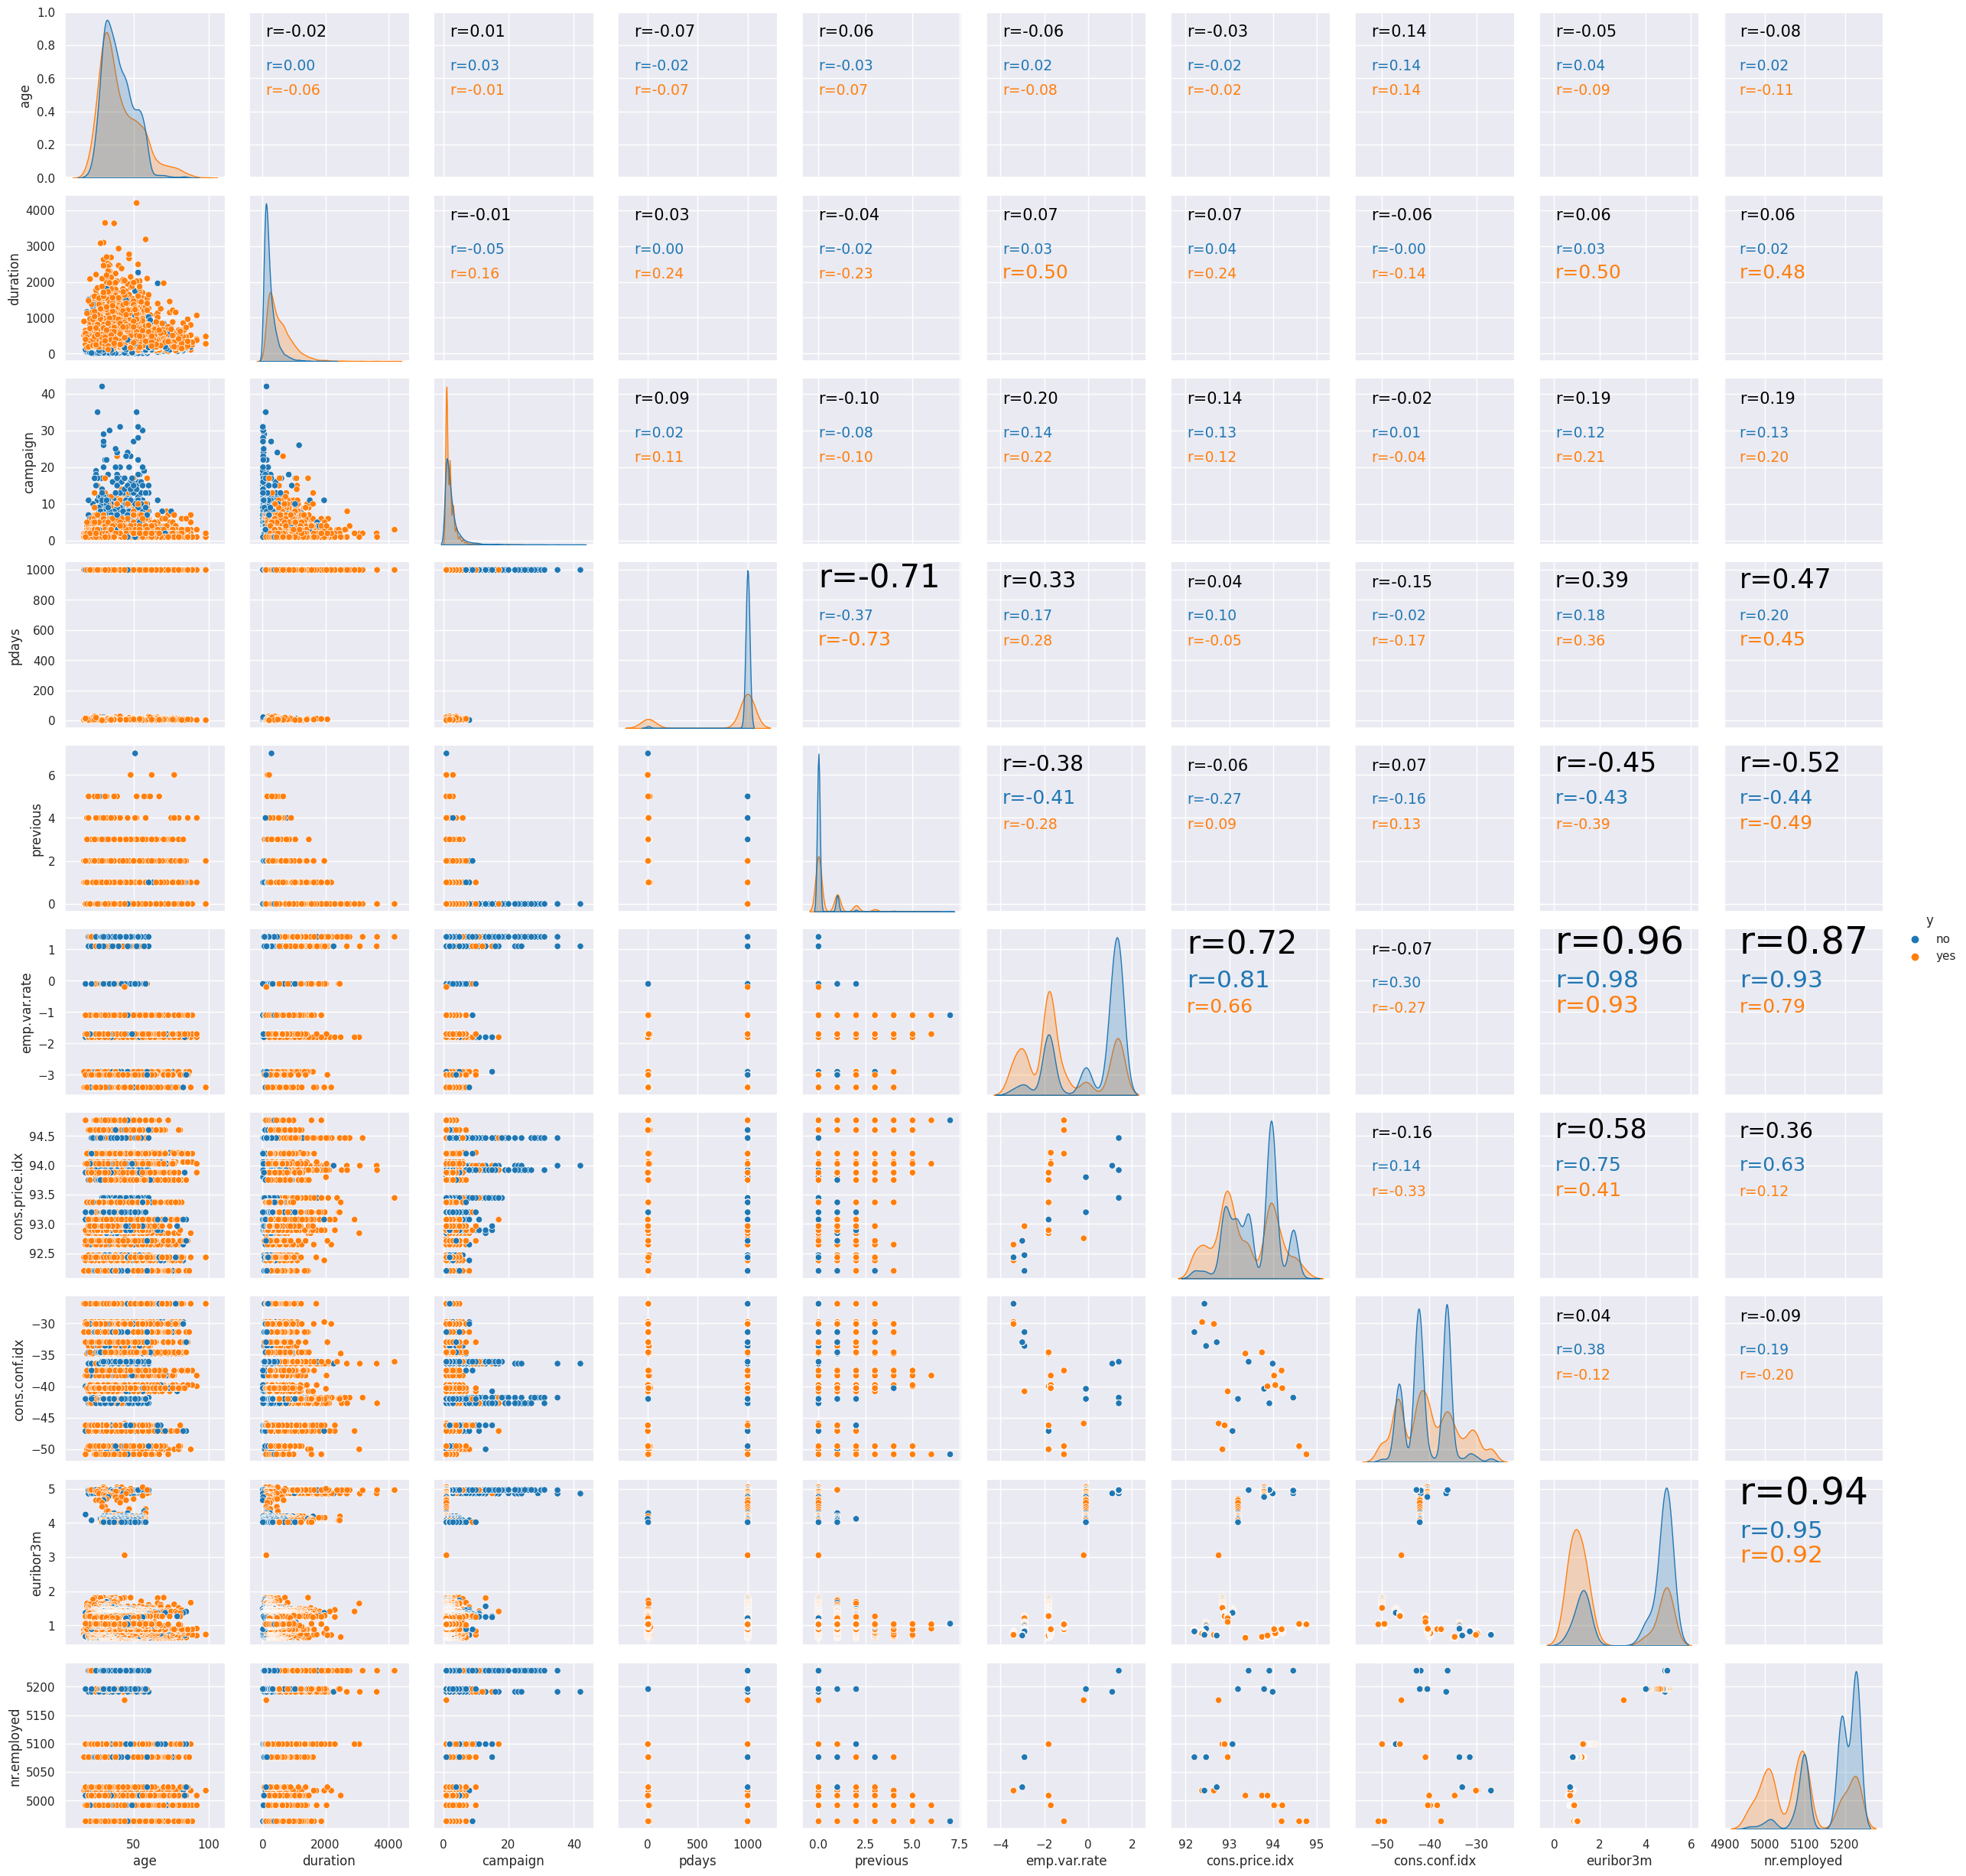

In [15]:
cp = CustomPairPlot()
cp.pairanalyzer(data, hue='y')

## Corr

In [16]:
data_temp = data.copy()
data_temp = data_temp.drop(labels=['y'], axis=1)
data_temp['y_number'] = [0 if val == 'no' else 1 for val in data['y'].values]

for col in object_columns:
    if col == 'y': continue
    le = LabelEncoder()
    data_temp[col] = le.fit_transform(data[col].values)

corr = data_temp.corr()
corr = corr['y_number'].drop(index=['y_number'])
corr = corr.sort_values()
corr

nr.employed      -0.476517
euribor3m        -0.455150
emp.var.rate     -0.436036
pdays            -0.313489
contact          -0.246228
cons.price.idx   -0.193329
default          -0.164149
campaign         -0.124919
loan             -0.012245
month            -0.002234
day_of_week       0.016766
housing           0.023659
job               0.036974
age               0.045653
cons.conf.idx     0.063575
marital           0.067804
education         0.092420
poutcome          0.158413
previous          0.265415
duration          0.452237
Name: y_number, dtype: float64

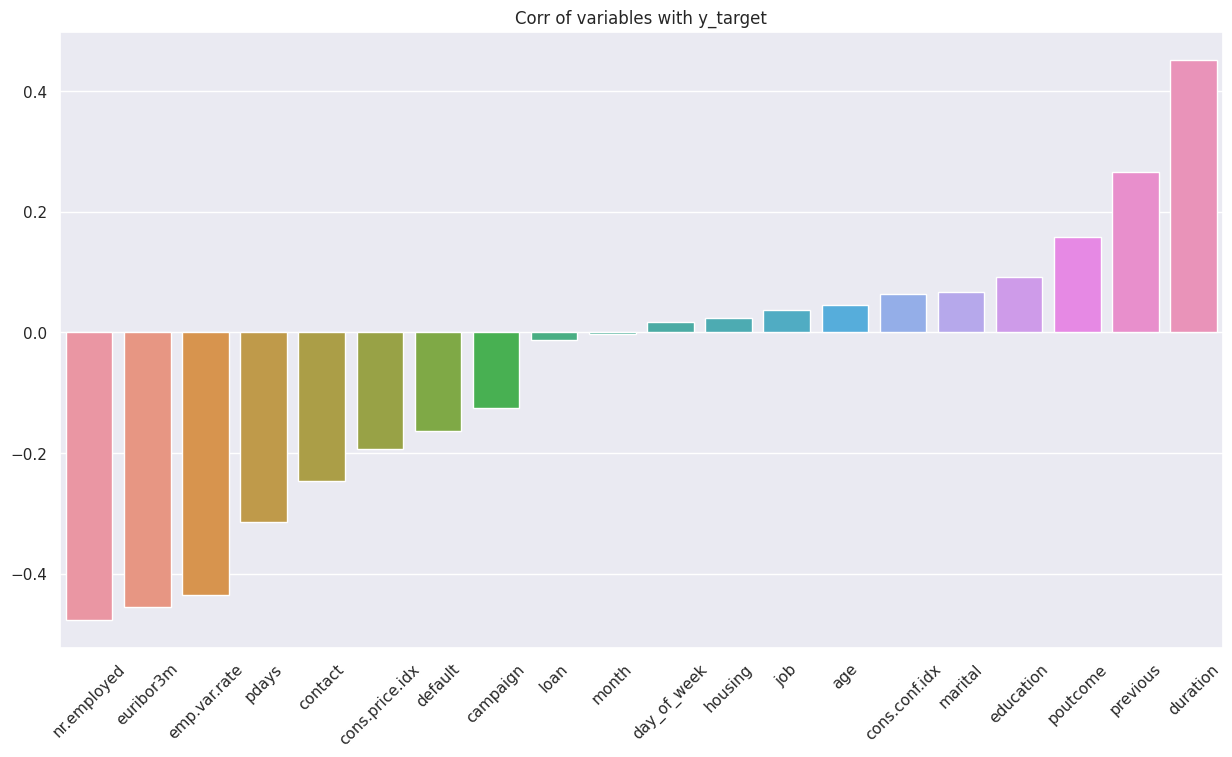

In [17]:
plt.figure(figsize=(15, 8))

sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation = 45)
plt.title("Corr of variables with y_target")
plt.show()

## Association Rule

In [32]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Onehot

In [35]:
# Prepare the dataset
data_set = []
for i in range(len(data)):
    row = data.iloc[i].astype(str)
    row_val = [f'{col}_{row[col]}' for col in data.columns]
    data_set.append(row_val)

te = TransactionEncoder().fit(data_set)
te_ary = te.transform(data_set)
te_ary

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True, False]])

In [36]:
df_onehot = pd.DataFrame(data=te_ary, columns=te.columns_)
df_onehot

,age_17,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,...,previous_0,previous_1,previous_2,previous_3,previous_4,previous_5,previous_6,previous_7,y_no,y_yes
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
41184,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
41185,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
41186,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True


### Build model

In [37]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [20]:
frequent_itemsets = fpgrowth(df_onehot, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.889739,(pdays_999)
1,0.845117,(default_no)
2,0.824208,(loan_no)
3,0.785191,(poutcome_nonexistent)
4,0.785191,(previous_0)
...,...,...
40770,0.057017,"(emp.var.rate_-3.4, nr.employed_5017.5)"
40771,0.055508,"(default_no, nr.employed_5017.5)"
40772,0.051304,"(contact_cellular, nr.employed_5017.5)"
40773,0.055508,"(nr.employed_5017.5, default_no, emp.var.rate_..."


In [21]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(default_no),(pdays_999),0.845117,0.889739,0.738306,0.873613,0.981875,-0.013628,0.872407,-0.106490
1,(pdays_999),(default_no),0.889739,0.845117,0.738306,0.829800,0.981875,-0.013628,0.910004,-0.143405
2,(loan_no),(pdays_999),0.824208,0.889739,0.733779,0.890284,1.000612,0.000449,1.004964,0.003480
3,(pdays_999),(loan_no),0.889739,0.824208,0.733779,0.824712,1.000612,0.000449,1.002878,0.005548
4,(loan_no),(default_no),0.824208,0.845117,0.696486,0.845037,0.999905,-0.000066,0.999482,-0.000540
...,...,...,...,...,...,...,...,...,...,...
2158707,"(contact_cellular, emp.var.rate_-3.4)",(nr.employed_5017.5),0.051304,0.057017,0.051304,1.000000,17.538752,0.048379,inf,0.993979
2158708,"(contact_cellular, nr.employed_5017.5)",(emp.var.rate_-3.4),0.051304,0.057017,0.051304,1.000000,17.538752,0.048379,inf,0.993979
2158709,"(nr.employed_5017.5, emp.var.rate_-3.4)",(contact_cellular),0.057017,0.719767,0.051304,0.899811,1.250142,0.010265,2.797041,0.212189
2158710,(emp.var.rate_-3.4),"(contact_cellular, nr.employed_5017.5)",0.057017,0.051304,0.051304,0.899811,17.538752,0.048379,9.469058,1.000000


### Filter target

In [22]:
col_rules = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
data_rules = []

for i in range(len(rules)):
    values = list(rules.iloc[i].values)
    # remove frozenset
    values[0] = list(values[0])
    values[1] = list(values[1])
    if len(values[0]) >= 2:
        values[0] = ', '.join(values[0])
        
    if ('y_no' in values[1] or 'y_yes' in values[1]) and (len(values[1]) <= 1):
        data_rules.append(
            [values[0], values[1][0], values[4], values[5], values[6]]
        )

output = pd.DataFrame(data=data_rules, columns=col_rules)

In [23]:
output.sort_values(by='confidence', ascending=False)

,antecedents,consequents,support,confidence,lift
10134,"contact_cellular, housing_yes, poutcome_success",y_yes,0.050226,0.951020,1.902041
10139,"contact_cellular, poutcome_success",y_yes,0.089243,0.950631,1.901263
10140,"contact_cellular, default_no, poutcome_success",y_yes,0.086441,0.950237,1.900474
10135,"campaign_1, poutcome_success",y_yes,0.052490,0.947471,1.894942
10132,"housing_yes, poutcome_success",y_yes,0.053136,0.946257,1.892514
...,...,...,...,...,...
4928,"default_no, poutcome_nonexistent, education_un...",y_yes,0.112093,0.500241,1.000481
4948,"default_no, education_university.degree, pdays...",y_yes,0.112093,0.500241,1.000481
4947,"default_no, previous_0, poutcome_nonexistent, ...",y_yes,0.112093,0.500241,1.000481
4946,"default_no, previous_0, education_university.d...",y_yes,0.112093,0.500241,1.000481


<Axes: xlabel='consequents', ylabel='count'>

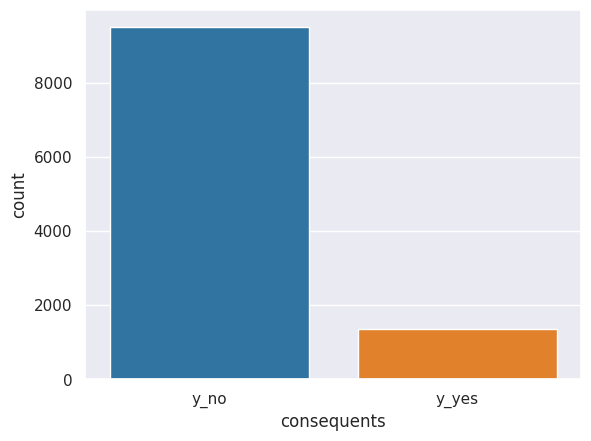

In [24]:
sns.countplot(output, x='consequents')

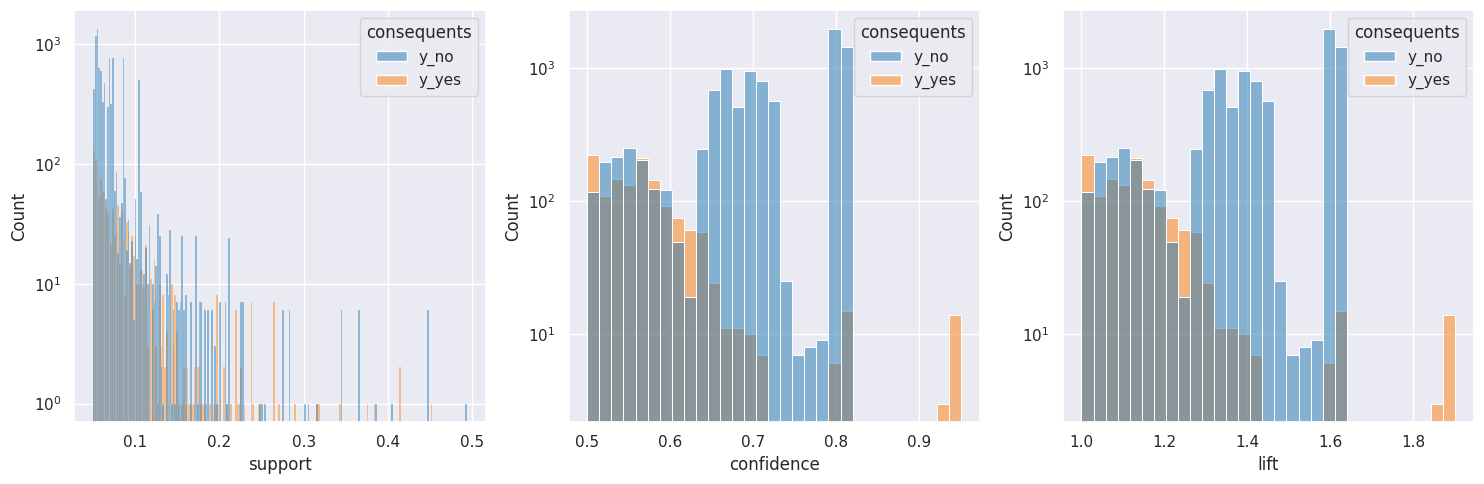

In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
sns.histplot(output, x='support', hue='consequents')
plt.yscale('log')

plt.subplot(1,3,2)
sns.histplot(output, x='confidence', hue='consequents')
plt.yscale('log')

plt.subplot(1,3,3)
sns.histplot(output, x='lift', hue='consequents')
plt.yscale('log')

plt.tight_layout()
plt.show()

### Predict with Association Rule

In [26]:
def predict(target_input, data_base=output):
    result = pd.DataFrame(columns=data_base.columns)
    for i in range(len(data_base)):
        antecedents = data_base['antecedents'].values[i]
        if all(item in antecedents for item in target_input):
            result = pd.concat([result, data_base.iloc[[i]]])
    return result

target_input = ['poutcome_success', 'loan_no']
prediction_result = predict(target_input)

In [27]:
prediction_result

,antecedents,consequents,support,confidence,lift
10125,"loan_no, poutcome_success",y_yes,0.079435,0.942455,1.884910
10126,"loan_no, default_no, poutcome_success",y_yes,0.077172,0.942105,1.884211
10127,"loan_no, contact_cellular, poutcome_success",y_yes,0.073507,0.945908,1.891817
10128,"loan_no, contact_cellular, default_no, poutcom...",y_yes,0.071352,0.945714,1.891429
